# Solving the Schrödinger Equation Numerically
## Defining derivatives and Second Derivatives
We are able to solve the Schrödinger Equation to find exact solutions (wavefunctions) for a few simple potential energy functions. For just about any potential energy function, we can numerically solve for the wavefunction solutions. To do this, we guess the first few points of the wavefunction in a region of the defined potential energy and then move point by point across the potential energy profile.

Let's take a look at the Schrödinger Equation in one dimension.

$$\frac{-\hbar^2}{2m}\frac{d^2\psi\left(x\right)}{dx^2} + U\left(x\right)\psi\left(x\right)= E\psi\left(x\right)$$

This is a differential equation where $\hbar$ is Planck's constant, $m$ is the mass of the particle behaving as a wave, $\psi\left(x\right)$ is a one-dimensional wavefunction that describes the particle's behavior in the potential energy $U\left(x\right)$.

We can write a discrete version of the derivative using the definition of a derivative. The fundamental theorem of calculus says

$$\frac{df}{dx}\Biggr\vert_x = \lim_{\Delta x\rightarrow 0}\frac{f\left(x+\Delta x\right)-f\left(x\right)}{\Delta x}$$

We can write this slightly differently to consider "previous" points as

$$\frac{df}{dx}\Biggr\vert_{x-\Delta x} = \lim_{\Delta x\rightarrow 0}\frac{f\left(x\right)-f\left(x-\Delta x\right)}{\Delta x}$$

These two derivatives define the derivative between two consecutive points. In the first case, the points are $x$ and $x+\Delta x$. In the second case, the points are $x-\Delta x$ and $x$.  Together they are two derivatives of three consectutive points as shown in the figure below.

![A function with three points for differentiating.](https://raw.githubusercontent.com/troymessina/ModernPhysics/master/images/f-x.png)

We can use these two derivatives to then define the second derivative around $x$ as "the derivative of the derivatives". Hopefully, it is obvious we need three points to do this.  To calclulate the second derivative, we take the difference between the two derivatives and divide by $\Delta x$. We still need to approach the limit as $\Delta x \rightarrow 0$. The second derivative looks like the following

$$\frac{d^2f}{dx^2} = \lim_{\Delta x\rightarrow 0} \left( \frac{\lim_{\Delta x\rightarrow 0}\left(\frac{f\left(x+\Delta x\right)-f\left(x\right)}{\Delta x}\right) - \lim_{\Delta x\rightarrow 0}\frac{f\left(x\right)-f\left(x-\Delta x\right)}{\Delta x}}{\Delta x}\right)$$

### Deliverable 1: Simplify
Show that this can be algebraically simplified to the following.

$$\frac{d^2f}{dx^2} = \lim_{\Delta x\rightarrow 0} \frac{f\left(x+\Delta x\right) -2f\left(x\right)+f\left(x-\Delta x\right)}{\left(\Delta x\right)^2} $$

### Deliverable 2: Check this equation
If we wanted to calculate the second derivative of a straight line, the values of $f$ would be evenly spaced for values of $x$ that are evenly spaced. For example a line with a slope of 1 and 0 intercept has points (0,0), (1,1), (2,2). Show that these points give a second derivative of zero. Why should you expect a line to have a zero second derivative?

## Application to the Schrödinger Equation
We just need to replace $f$ with $\psi$ and $x$ is $x$.

$$\frac{-\hbar^2}{2m}\frac{d^2\psi\left(x\right)}{dx^2} +U\left(x\right)\psi\left(x\right)= E\psi\left(x\right)$$

$$$$

$$\frac{-\hbar^2}{2m}\frac{\psi\left(x+\Delta x\right) -2\psi\left(x\right)+\psi\left(x-\Delta x\right)}{\left(\Delta x\right)^2} +U\left(x\right)\psi\left(x\right)= E\psi\left(x\right)$$

After some rearranging, we get

$$\psi\left(x+\Delta x\right)  = 2\psi\left(x\right)-\psi\left(x-\Delta x\right)+\frac{2m\left(\Delta x\right)^2}{\hbar^2}\left(U\left(x\right)-E\right)\cdot \psi\left(x\right)$$

This equation shows us that we can predict the next wavefunction value based on the previous two values of the wavefunction as we progress through the $x$ direction. A computer can do this provided we break the continuous $x$ variable up into discretized values spaced by $\Delta x$. It is important that those values are close enough together that they are in the limit of going to zero (compared to how fast there are changes in the wavefunction). Keep Riemann in mind.

To perform this computation, we must provide the computer with the potential energy $U(x)$ as well as the mass of the particle experiencing the potential energy and constant $\hbar$. We are interested in a quantum system that has discrete energies. We'll need to give the computer an energy $E$, but this energy must be an energy eigenvalue in order to obtain a valid wavefunction. Finally, we need to provide the first two $x$ and $\psi(x)$ values.

But where do these values come from and why do we need two? We need two because the Schrödinger Equation is a second order differential equation. Mathematically speaking, the second derivative is curvature, and to obtain curvature, we need three points. Two of these points we provide and the third is predicted by the computer. Since we eventually normalize the wavefunction, it does not matter what the amplitude is to begin with.

## Infinite Well
Let's start with a simple example. The infinite well has a potential energy of zero over a small region of $x$. Everywhere else it is infinite. This means we just need to define $x$ over the small region because the particle can never climb the infinitely high walls to be anywhere other than this region. We also need a mass. Let's start with an electron ($m=9.11\times10^{-31} ~{\rm kg}$). Before we compute, let's take a look at the Schrödinger Equation and simplify since the wavefunction only has an amplitude where the potential is zero ($U(x)=0$).

$$\frac{-\hbar^2}{2m}\frac{d^2\psi\left(x\right)}{dx^2} +U\left(x\right)\psi\left(x\right)= E\psi\left(x\right)$$

$$\frac{-\hbar^2}{2m}\frac{d^2\psi\left(x\right)}{dx^2} +0= E\psi\left(x\right)$$

$$\frac{d^2\psi\left(x\right)}{dx^2} = -\frac{2mE}{\hbar^2}\psi\left(x\right)$$

and using our discretized version above

$$\psi\left(x+\Delta x\right)  = 2\psi\left(x\right)-\psi\left(x-\Delta x\right)-\frac{2m\left(\Delta x\right)^2}{\hbar^2}E\cdot \psi\left(x\right)$$

Okay, that looks complicated, but here's what we do. We create an array of $x$ values that have $\Delta x$ much smaller than the width of the potential well. 

1. We'll start with a well that is 5 nm wide and break it into 0.01 nm intervals.
2. We define $m$.
3. We define $E$.
4. We define $\psi(0)$ and $\psi(0.01~{\rm nm})$, the first two values of the wavefunction

In [1]:
# import functions
import numpy as np #import all numpy
from numpy import arange, pi, sin, cos, sqrt, exp #import this specific functions from numpy

%matplotlib inline

get_ipython().magic('matplotlib inline') # inline plotting

# figure size and font size
import matplotlib as mpl #now we can use mpl instead of writing matplotlib 
import matplotlib.pyplot as plt #now we can use plt instead of writing the whole thing
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Units
We can use sensible units such as nanometer and eV to do our calculations. For example, the energies of the infinite well are

$$ E_n = \frac{n^2h^2}{8mL^2} = \frac{n^2\left(hc\right)^2}{8\left(mc^2\right)L^2}$$

Using $hc=1240$ nm, $L$ in nm, and $mc^2$ in eV ($m$ in ${\rm eV/c^2}$), would make sense for these calculations to give numbers that are not incredibly small.

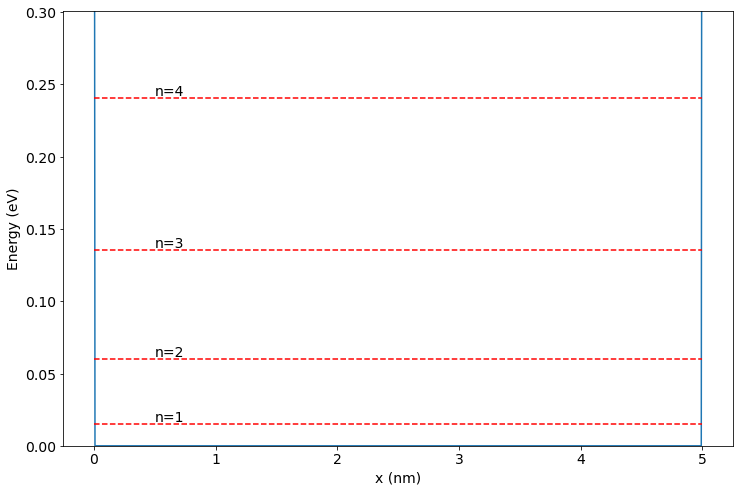

In [2]:
m = 0.511e6 #electron mass in eV/c^2
hc = 1240 #Planck's constant in eV nm

# Set up the potential energy well range (x-values)
xL = 0.0 #Left side of the potential well
xR = 5.0 #Right side of the potential well
dx = 0.01 #x increment
x = np.arange(xL, xR+dx, dx) #x values 0 to 5 nm in 0.01 nm steps
# We can artificially create a potential well to graph, but it won't be used
# in the wavefunction calculations since we assume the potential is zero in the
# region of interest.
infinite_well=np.zeros(x.size)
infinite_well[0] = 1 # 1 Joule is essentially infinity for our purposes
infinite_well[-1] = 1

# We could solve for energies since we know ahead what the allowed values look like
# n = 1 # or 2, 3, 4, etc.
# k = 2*pi*n/(xR-xL)
# E = (hbar*k)**2/(2*m)
# or we can try to search for "good" energies
E = 1 #energy of the electron in eV

#Create arrays that have the energy levels
En1 = np.full(x.size, (hc*1)**2/((xR-xL)**2*(8*m)))
En2 = np.full(x.size, (hc*2)**2/((xR-xL)**2*(8*m)))
En3 = np.full(x.size, (hc*3)**2/((xR-xL)**2*(8*m)))
En4 = np.full(x.size, (hc*4)**2/((xR-xL)**2*(8*m)))

#Plot the potential energy
label_shift = 0.1*En1[0]
plt.plot(x, infinite_well)
plt.plot(x, En1, 'r--')
plt.annotate('n=1', (0.5, label_shift+En1[0]))
plt.plot(x, En2, 'r--')
plt.annotate('n=2', (0.5, label_shift+En2[0]))
plt.plot(x, En3, 'r--')
plt.annotate('n=3', (0.5, label_shift+En3[0]))
plt.plot(x, En4, 'r--')
plt.annotate('n=4', (0.5, label_shift+En4[0]))
plt.xlabel('x (nm)')
plt.ylabel('Energy (eV)')
plt.ylim(0, 1.25*En4[0])
plt.show()

In [3]:
# Initialize the wavefunction array
psi = np.zeros(x.size, dtype=float) #create a wavefunction this is assigned all zeros
psi[0] = np.random.normal() #randomly choose the first value from a normalized normal distribution
psi[1] = np.random.normal() #randomly choose the second value

### Our initial setup
Let's take alook at the wavefunction that only has two random initial points. If you re-run the cell above, the cell below should change (when re-run) because of the random numbers in the first two points.

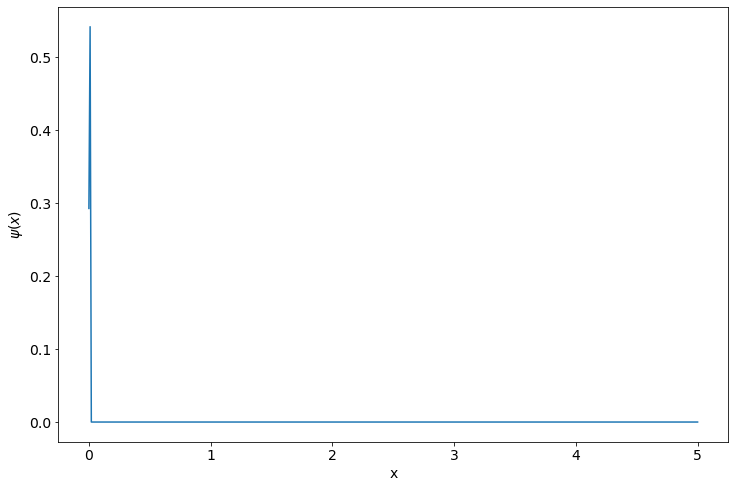

In [4]:
plt.plot(x, psi)
plt.xlabel('x')
plt.ylabel(r'$\psi (x)$')
plt.show()

Clearly this is not a wave function. Now, we implement our numerical solver. Below, we define the energy eigenvalue level, the energy, and then we loop over the wavefunction calculating it based on the discretized second derivative method. Pay close attention to how that is done, You will make a modified version for the simple harmonic oscillator and hydrogen atom later. After calculating the wavefunction point-by-point, we normalize the wavefunction by dividing by its sum. Finally, we plot the wavefunction.

n =  1, E_n = 0.015  eV


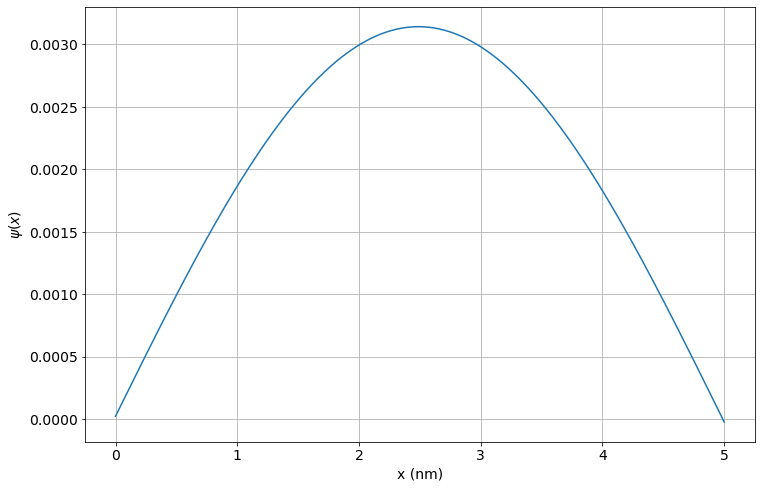

In [5]:
# We can jump right to correct solutions by using the energy solutions for the infinite well.
n=1
E=(hc*n)**2/(8*m*(xR-xL)**2)
print("n = {0:2d}, E_n = {1:2.3f}  eV".format(n, E))

#We already assigned the first two values of psi
#We'll loop through the remaining elements of psi to calculate them.
for i in range(2, x.size):
  psi[i] = 2 * psi[i-1] - psi[i-2] -2*m*dx**2*E/(hc/(2*pi))**2*psi[i-1]

#Normalize the wavefunction
psi_sum = np.sum(psi)
psi /= psi_sum

#plot the wavefuncti0n
plt.plot(x, psi)
plt.xlabel('x (nm)')
plt.ylabel(r'$\psi (x)$')
plt.grid(True)
plt.show()

We can plot this on the same graph as the potential and energy level for a better visualization.

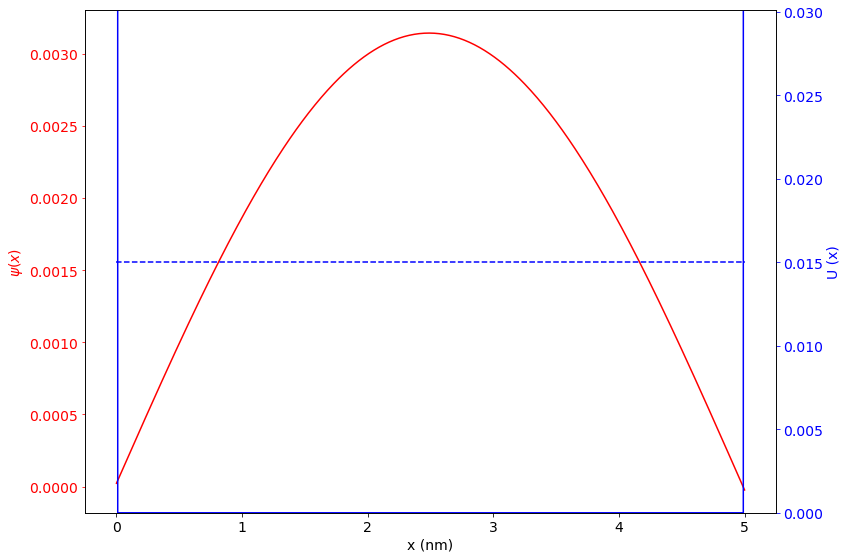

In [6]:
fig, ax1 = plt.subplots()
#Plot the wavefunction on the left axis
ax1.plot(x, psi, 'r-')
ax1.set_xlabel('x (nm)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(r'$\psi (x)$', color='r')
ax1.tick_params('y', colors='r')
#Plot the potential well and energy level on the right axis
ax2 = ax1.twinx()
ax2.plot(x, infinite_well, 'b')
ax2.plot(x, En1, 'b--')
ax2.set_ylabel('U (x)', color='b')
ax2.tick_params('y', colors='b')
ax2.set_ylim([0, 2*En1[0]])

fig.tight_layout()
plt.show()

### Deliverable 3 - Assessment
Explain whether the result looks correct. This will take some manipulating to test it. Specifically,
1. Does the wavefunction do what is expected at the boundaries of the box?
    * If not, does forcing the first value $\psi(0)=0$ help?
2. Does the wavefunction do what is expected if other energy eigenvalues are used, e.g., $n=2, 3, 4$?
3. Does the wavefunction do what is expected if non-eigenvalue energies are used?
4. Challenge: Can you plot multiple wavefunctions and shift them so they start vertically from their energy level?

# Harmonic Oscillator
Now, let's look at a potential well that not zero over the entire region of interest. The harmonic oscillator is a fancy term for a spring-mass system, except in this case is quantum mechanical. The potential energy of the spring-mass system is

$$U = \frac{1}{2}k_{spring} x^2$$

I've denoted the spring constant so that we don't get it mixed up with the wavenumber $k=2\pi/\lambda$.  The quantum mechanical energies for a harmonic oscillator are

$$E_n = \left(n+\frac{1}{2}\right)\hbar \omega$$

where

$$\omega = \sqrt{\frac{k_{spring}}{m}}$$.

The potential energy goes to infinity for large stretch or compression. So, we don't have to worry about particle escape. Our Schrödinger Equation needs to take this into account. The discretized Schrodinger Equation will look like the following.

$$\psi\left(x+\Delta x\right)  = 2\psi\left(x\right)-\psi\left(x-\Delta x\right)+\frac{2m\left(\Delta x\right)^2}{\hbar^2}\left(U\left(x\right)-E\right)\cdot \psi\left(x\right)$$

We will need to do point-by-point subtraction for the total and potential energy. Let's assume we are analyzing the vibrational energies of HCl. The spring constant is about 550 N/m, The chlorine can be assumed as fixed while the hydrogen vibrates. Thus, the mass is that of hydrogen.

### Set it up
1. Define constants $\hbar$, $k_{spring}$, $m$.
2. Define the left and right boundaries as $\pm 1~{\rm Angstrom}$.
3. Define the increment $\Delta x = 0.001~{\rm Angstrom}$.
4. Create $x$ values using `np.arange`.
    * Note: `np.arange` goes from start to end-step. So, add a step to end to make it go start to end.
5. Define the simple harmonic oscillator potential energy.
6. Define the first five energy levels using theconstants and $x$ array you created in step 4 above.

In [88]:
# Define the potential energy well
hbar = 1.05457e-34 #Planck's constant
k_spring = 500 # spring constant in N/m
m_harmonic = 1.67e-27 # something on the scale of an atom attached by a bond
xL_harmonic = -0.5e-10
xR_harmonic = 0.5e-10
dx_harmonic = 0.001e-10
x_harmonic = np.arange(xL_harmonic, xR_harmonic+dx_harmonic, dx_harmonic) # x values
harmonic_well = 0.5 * k_spring * x_harmonic**2

# Make some energy levels to plot
E_0 = np.full(x_harmonic.size, (0+0.5)*hbar*sqrt(k_spring/m_harmonic))
E_1 = np.full(x_harmonic.size, (1+0.5)*hbar*sqrt(k_spring/m_harmonic))
E_2 = np.full(x_harmonic.size, (2+0.5)*hbar*sqrt(k_spring/m_harmonic))
E_3 = np.full(x_harmonic.size, (3+0.5)*hbar*sqrt(k_spring/m_harmonic))
E_4 = np.full(x_harmonic.size, (4+0.5)*hbar*sqrt(k_spring/m_harmonic))

### Plot the potential energy and energy levels
As long as you used the pre-defined names above, you only need to shift-enter to make the graph below. You may want to adjust the x and y limits.

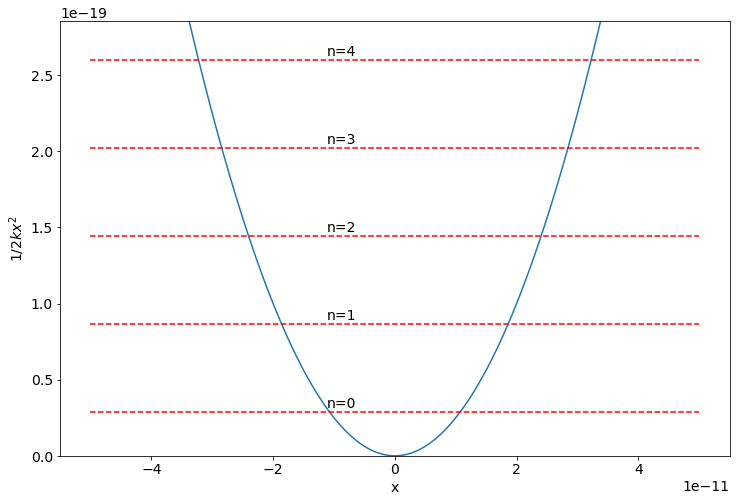

In [89]:
#Plot the potential energy
label_shift = 0.1*E_0[0]
plt.plot(x_harmonic, harmonic_well)
plt.plot(x_harmonic, E_0, 'r--')
plt.annotate('n=0', (xL_harmonic/4.5, label_shift+E_0[0]))
plt.plot(x_harmonic, E_1, 'r--')
plt.annotate('n=1', (xL_harmonic/4.5, label_shift+E_1[0]))
plt.plot(x_harmonic, E_2, 'r--')
plt.annotate('n=2', (xL_harmonic/4.5, label_shift+E_2[0]))
plt.plot(x_harmonic, E_3, 'r--')
plt.annotate('n=3', (xL_harmonic/4.5, label_shift+E_3[0]))
plt.plot(x_harmonic, E_4, 'r--')
plt.annotate('n=4', (xL_harmonic/4.5, label_shift+E_4[0]))
plt.xlabel('x')
plt.ylabel(r'$1/2 kx^2$')
plt.ylim(0, 1.1*E_4[0])
#plt.xlim(xL_harmonic/4, xR_harmonic/4)
plt.show()

Notice for the harmonic oscillator the energy levels are equally spaced. This is because the potential energy continuously increases as the square of the position. When the energy is constant with position, we see a quadratically spaced energy diagram (infinite well). In the hydrogen atom, the potential energy depends on $1/r$, and we see the energy spacing decreasing quadratically. Thus, the energy solutions to the Schrodinger Equation depend strongly on the potential energy of the system.

### Solving the wavefunctions

Now, let's use our numerical method to solve for the wave functions. Referencing the quanton in a box example above,
1. Define the wavefunction array.
2. Define the first two points of the wavefunction.
3. Choose an energy level (start with n=0).
4. Define the energy array you plan to use, e.g., if `n=1`, `E_graph=E_1` (E_1 is defined above.)
5. Insert the code in the `for` loop to calculate the wavefunction.

One thing to keep in mind is that the potential energy at the edges should be greater than the energy eigenvalue by a factor of 5 or more. However, if it is too great, the numerical solver has difficulty because the quanton is in a classically forbidden region when it begins calculating. Therefore, you may need to adjust the range of x values above depending on the particular energy eigenfunction you want to calculate.

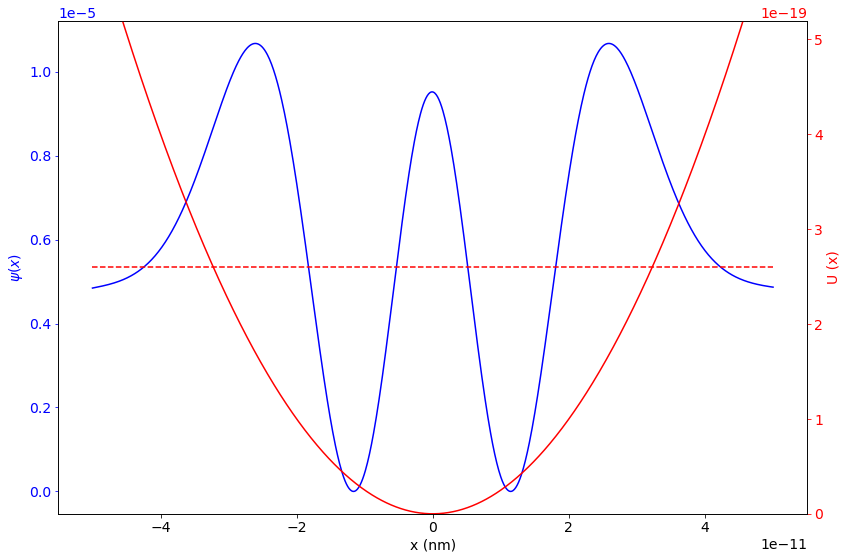

In [90]:
psi = np.zeros(x_harmonic.size, dtype=float) #create a wavefunction this is assigned all zeros
psi[0] = np.random.normal() #randomly choose the first value
psi[1] = np.random.normal() #randomly choose the second value

# We can jump right to correct solutions by using the energy solutions for the infinite well.
# Define the quantum energies
#n_harmonic = 2 # 1, 2, 3, etc. Different because it starts at zero.

E_graph = E_4

#We already assigned the first two values of psi
#We'll loop through the remaining elements of psi to calculate them.
for i in range(2, x_harmonic.size):
  psi[i] = 2 * psi[i-1] - psi[i-2] + 2*m_harmonic*dx_harmonic**2*(harmonic_well[i]-E_graph[i])/hbar**2*psi[i-1]
 
psi += abs(np.amin(psi)) #make sure the wavefunction is positive
psi /= np.sum(psi_sum)#normalize the wavefunction

fig, ax1 = plt.subplots()
ax1.plot(x_harmonic, psi, 'b-')
ax1.set_xlabel('x (nm)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(r'$\psi (x)$', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim([0, 1e-5])

ax2 = ax1.twinx()
ax2.plot(x_harmonic, harmonic_well, 'r')
ax2.plot(x_harmonic, E_graph, 'r--')
ax2.set_ylabel('U (x)', color='r')
ax2.tick_params('y', colors='r')
#ax2.set_xlim(xL_harmonic/4, xR_harmonic/4)
ax2.set_ylim(0, 2*E_graph[0])

fig.tight_layout()
plt.show()

Verify that the method works for several different energy eigenvalues.

## Hydrogen Wavefunctions

There is nothing special about what we did above. You can create an array for the hydrogen potential energy and repeat everything above to generate numerical solutions for the hydrogen atom. Give it a try.

Bohr Radius: a0 = 4.757 A


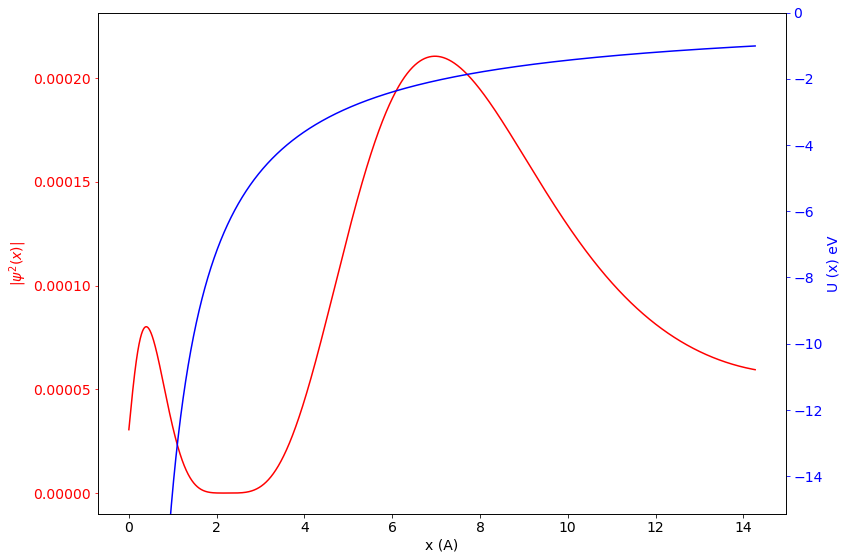

In [129]:
n = 3 #energy eigenvalue
q = 1.602e-19 #charge of electron and proton Coulomb
oofpez = 8.988e9 #one over four pi epsilon naught m-kg-s
hbar = 1.05457e-34 #Plank's constant J-s
m = 9.11e-31 #electron mass kg
xL = 1e-5 #don't go to zero because V(x) goes to -infinity (in Angstrom)
a0 = n**2*hbar**2/(kk*q*q*m)*1e10 #Calculate the Bohr Radius in Angstrom
xR = 3*a0 #right x end in Angstrom
dx = (xR-xL)/10000

print ("Bohr Radius: a0 = {:2.3f} A".format(a0))

E = -q**2*oofpez/(2*a0/1e10)#-m*oofpez**2*q**4/(2*hbar**2*n**2) #energy eigenvalue

x = np.arange(xL, xR+dx, dx) #x values 

#Initialize the wavefunction array
psi = np.zeros(x.size, dtype=float) #create a wavefunction this is assigned all zeros
psi[0] = 0 #randomly choose the first value
psi[1] = np.random.normal() #randomly choose the second value


# We can jump right to correct solutions by using the energy solutions for the infinite well.
U = -oofpez*(q*q)/(x*1e-10)# + kk*q*q/(xL*1e-10)

#We already assigned the first two values of psi
#We'll loop through the remaining elements of psi to calculate them.
for i in range(2, x.size):
  psi[i] = 2 * psi[i-1] - psi[i-2] +2*m*(dx*1e-10)**2*(U[i]-E)/hbar**2*psi[i-1]

psi += abs(np.amin(psi))
psi *= psi
psi /= np.sum(psi)

fig, ax1 = plt.subplots()
ax1.plot(x, psi, 'r-')
ax1.set_xlabel('x (A)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(r'$\left|\psi^2 (x)\right|$', color='r')
ax1.tick_params('y', colors='r')
ax1.set_ylim([-1e-5, 1.1*np.amax(psi)])

ax2 = ax1.twinx()
ax2.plot(x, U/q, 'b')
#ax2.plot(x, E, 'b--')
ax2.set_ylabel('U (x) eV', color='b')
ax2.tick_params('y', colors='b')
ax2.set_ylim(10*E/q, 0)

fig.tight_layout()
plt.show()

Can you verify that other energy levels give wavefunctions that you expect?

# Probability Distribution
What we measure when particles behave like waves is the probability distribution. This is the square of the wavefunction. Can you plot a normalized probability distribution? HINT: You will need to square the wavefunction and then make sure that its values sum to 1.

numpy has a sum function (np.sum). If you calculate the sum of the squared wavefunction, you can normalize by dividing by that value.